**Data Collection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv("/content/UpdatedResumeDataSet.csv" ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


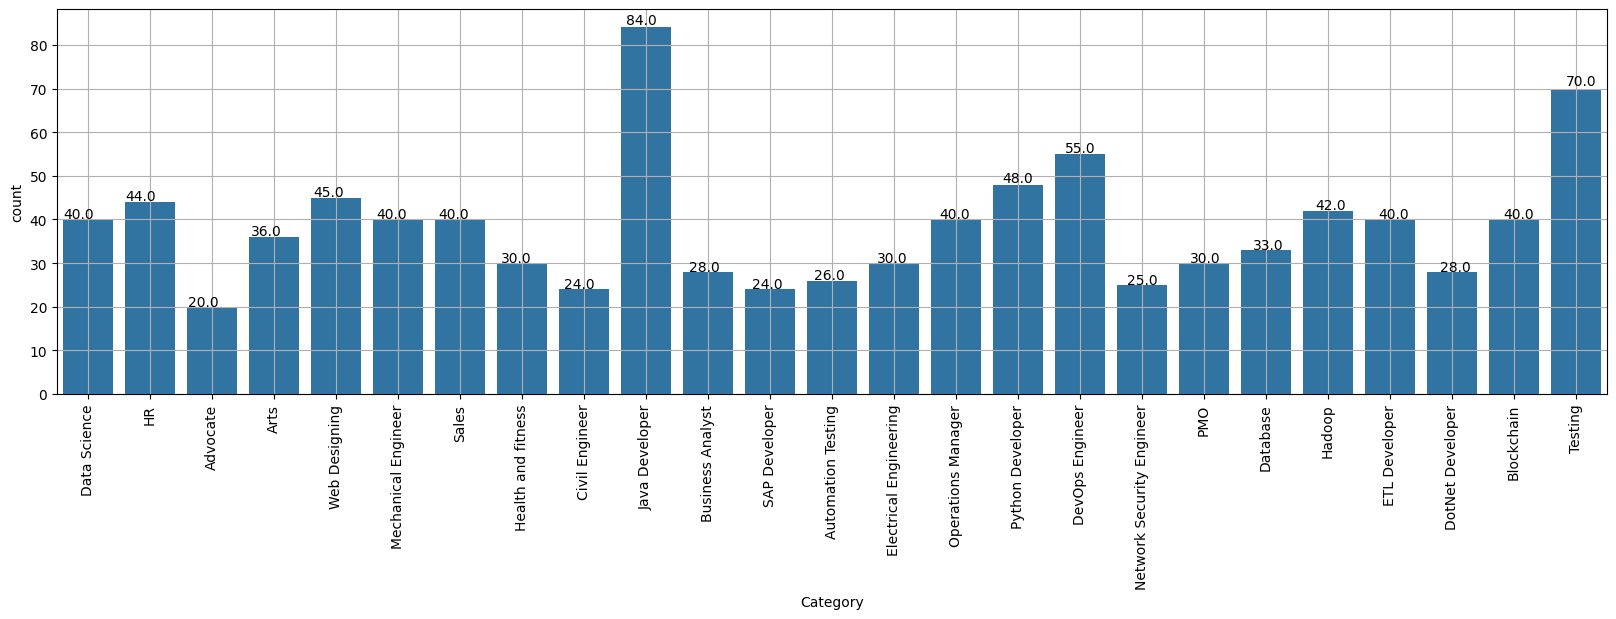

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()



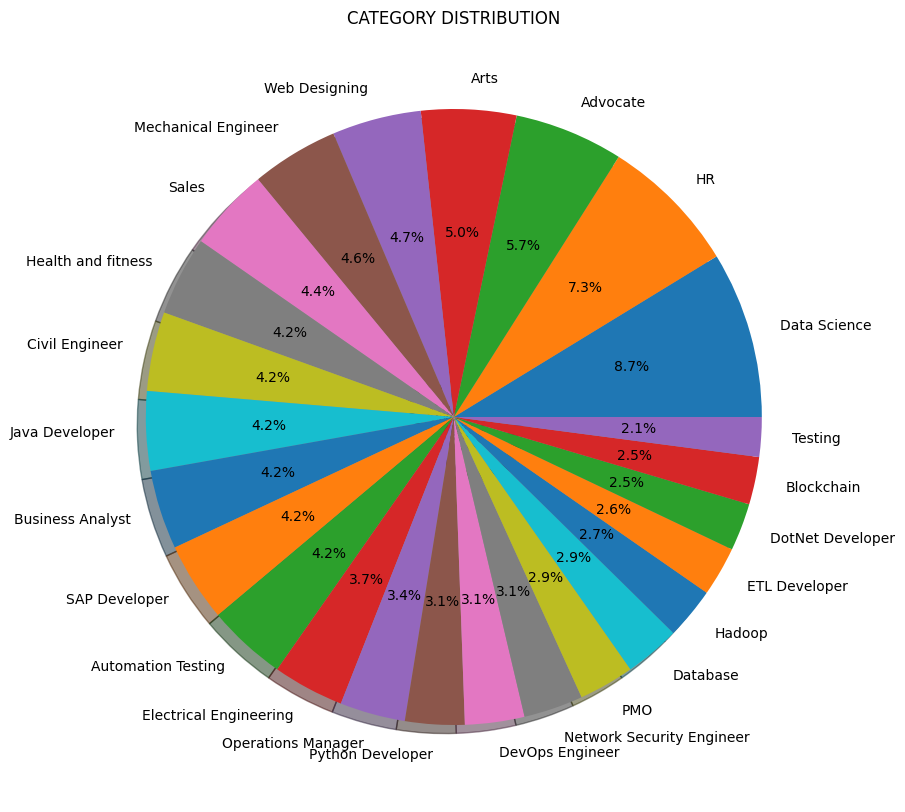

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

**Data Precprocessing**

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))


In [ ]:
resumeDataSet_d=resumeDataSet.copy()

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download("stopwords")
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


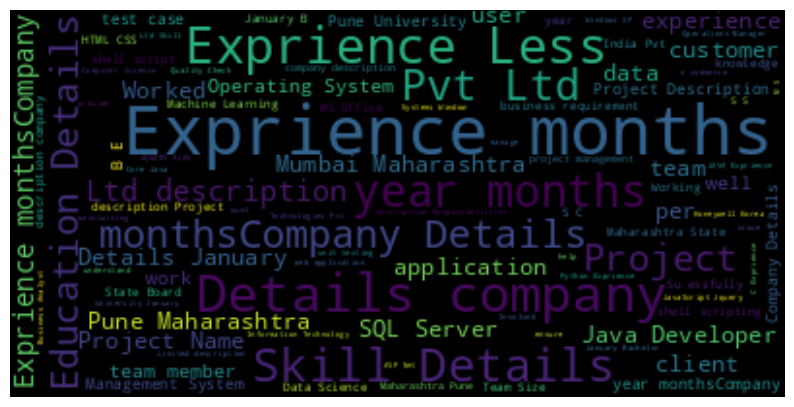

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeDataSet.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [ ]:
resumeDataSet_d.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [ ]:
category_mapping = {
    "Java Developer": 15,
    "Testing": 23,
    "DevOps Engineer": 8,
    "Python Developer": 20,
    "Web Designing": 24,
    "HR": 12,
    "Hadoop": 13,
    "Blockchain": 3,
    "ETL Developer": 10,
    "Operations Manager": 18,
    "Data Science": 6,
    "Sales": 22,
    "Mechanical Engineer": 16,
    "Arts": 1,
    "Database": 7,
    "Electrical Engineering": 11,
    "Health and fitness": 14,
    "PMO": 19,
    "Business Analyst": 4,
    "DotNet Developer": 9,
    "Automation Testing": 2,
    "Network Security Engineer": 17,
    "SAP Developer": 21,
    "Civil Engineer": 5,
    "Advocate": 0
}

print("Category Map:")
for category, index in category_mapping.items():
    print(f"{category}: {index}")


Category Map:
Java Developer: 15
Testing: 23
DevOps Engineer: 8
Python Developer: 20
Web Designing: 24
HR: 12
Hadoop: 13
Blockchain: 3
ETL Developer: 10
Operations Manager: 18
Data Science: 6
Sales: 22
Mechanical Engineer: 16
Arts: 1
Database: 7
Electrical Engineering: 11
Health and fitness: 14
PMO: 19
Business Analyst: 4
DotNet Developer: 9
Automation Testing: 2
Network Security Engineer: 17
SAP Developer: 21
Civil Engineer: 5
Advocate: 0


In [ ]:
del resumeDataSet_d

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [ ]:
print(X_train)

  (0, 7327)	0.03610792293507044
  (0, 7326)	0.06357655302715529
  (0, 7278)	0.03433369636977208
  (0, 7269)	0.061258355775104
  (0, 7218)	0.03552689254910347
  (0, 7196)	0.05153904388310622
  (0, 7025)	0.024202494969703083
  (0, 7020)	0.059973115270960074
  (0, 7003)	0.08082648367211584
  (0, 6975)	0.02327802803251575
  (0, 6957)	0.04621985368152564
  (0, 6944)	0.04887180523755805
  (0, 6923)	0.034274491905035925
  (0, 6910)	0.057326619341132194
  (0, 6909)	0.03661534796194455
  (0, 6895)	0.07394794664845018
  (0, 6796)	0.058518946551246266
  (0, 6782)	0.06357655302715529
  (0, 6781)	0.08128935913338502
  (0, 6775)	0.0545125255184938
  (0, 6766)	0.030910966226625283
  (0, 6754)	0.03591099980793299
  (0, 6751)	0.033535276713283935
  (0, 6721)	0.02548216359756034
  (0, 6703)	0.06357655302715529
  :	:
  (768, 1699)	0.08434473367660358
  (768, 1670)	0.11863808927168562
  (768, 1668)	0.07174694261600066
  (768, 1574)	0.06254294604003997
  (768, 1573)	0.06415188687767355
  (768, 1570)	0.0388

**Classifiaction using scikit-learn inbuilt model**

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [ ]:
print(prediction)

[10 14  0 11 18 19 15  5 18 18 12  6 15  8  3 10 16 23  6 15 20 19 12 21
  8  6  7  6 17 12  1 21 22  5 22 17 10 12 15 15 22  5  1  4 23 24  8  6
 15 15 11 23 19 14  8 16  8 23  9  4 12 15  6 15  8  3 18 24  2 10 23  2
 22 13  0 15 19  2 13  0 20 14  1 16 21  9 23 20 23 17 18 24 10 13 20  1
 10  8 11  7  7 14 24 22 13 15  6  9 14  3  4 15 20  4 11 15 16 15  0 13
 15 19  6 10 20  3 13 12  8 11 24 16 11  6 21 18 18 14  5  7  1  5 13 15
 12 20 23  3 20 24 18 23 12 17 15  9  1 12 16  3 20 23  7 20 22 16 23 24
 23 17  7 23 11  1  8 13 19 23  8 10  4 24  3  2  3  4  9 22 24 21 23 22
 16]


**RNN Model Implementation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values


max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(requiredText)

X_sequences = tokenizer.texts_to_sequences(requiredText)


max_len = 200
X_padded = pad_sequences(X_sequences, maxlen=max_len)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(requiredTarget)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

model_train = Sequential()
model_train.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model_train.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model_train.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_train.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_train.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

y_pred = model_train.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)



Epoch 1/100
13/13 [==============================] - 10s 439ms/step - loss: 3.2043 - accuracy: 0.1821 - val_loss: 3.1829 - val_accuracy: 0.1710
Epoch 2/100
13/13 [==============================] - 7s 521ms/step - loss: 3.1398 - accuracy: 0.1638 - val_loss: 3.0905 - val_accuracy: 0.1710
Epoch 3/100
13/13 [==============================] - 5s 411ms/step - loss: 3.0039 - accuracy: 0.2263 - val_loss: 2.9436 - val_accuracy: 0.1969
Epoch 4/100
13/13 [==============================] - 7s 513ms/step - loss: 2.7058 - accuracy: 0.2497 - val_loss: 2.6042 - val_accuracy: 0.3057
Epoch 5/100
13/13 [==============================] - 5s 412ms/step - loss: 2.4176 - accuracy: 0.2757 - val_loss: 2.2521 - val_accuracy: 0.2642
Epoch 6/100
13/13 [==============================] - 7s 518ms/step - loss: 2.2639 - accuracy: 0.4096 - val_loss: 2.1663 - val_accuracy: 0.4922
Epoch 7/100
13/13 [==============================] - 5s 414ms/step - loss: 1.9998 - accuracy: 0.4408 - val_loss: 1.9590 - val_accuracy: 0.523

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

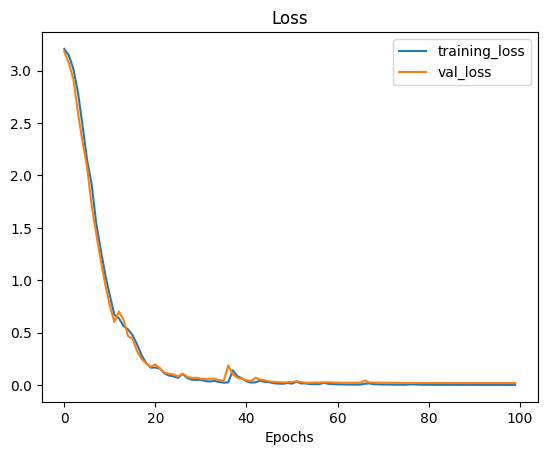

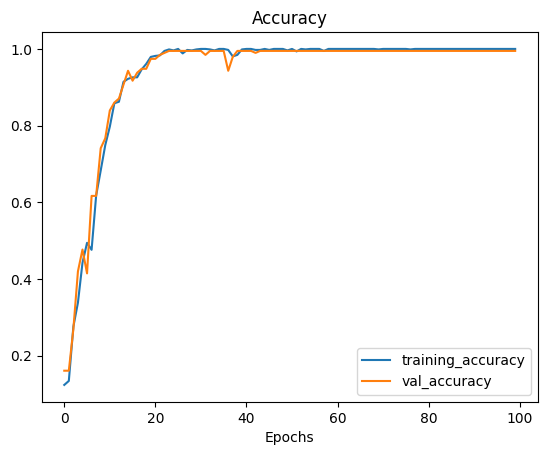

In [ ]:
plot_loss_curves(history)

In [ ]:
print("Shape of y_test:", y_pred.size)
print("Shape of y_pred:", y_test.size)


Shape of y_test: 4825
Shape of y_pred: 193


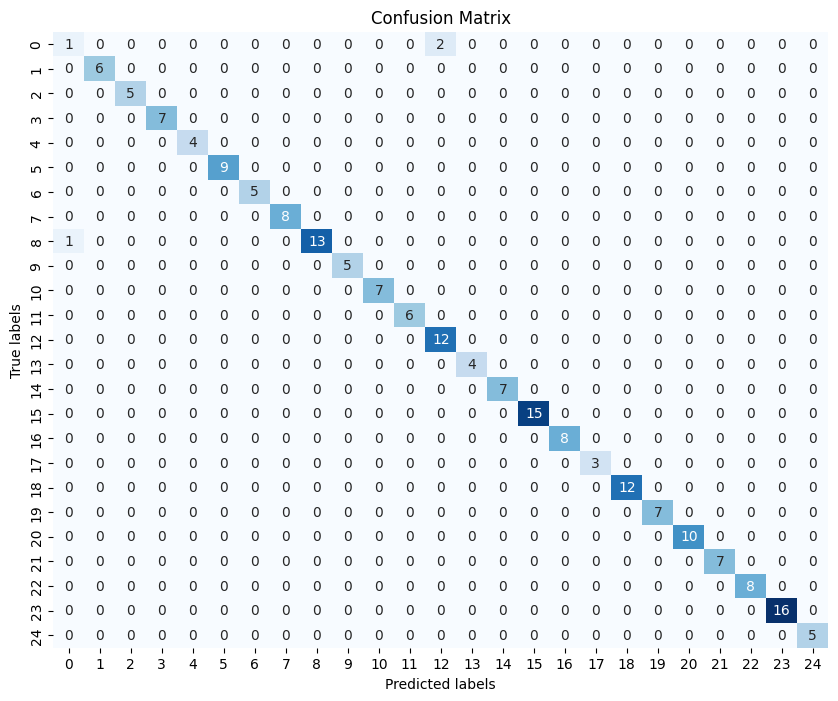

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_categorical = label_encoder.inverse_transform(y_pred_labels)

conf_matrix = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_categorical)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Category Map:
Java Developer: 15
Testing: 23
DevOps Engineer: 8
Python Developer: 20
Web Designing: 24
HR: 12
Hadoop: 13
Blockchain: 3
ETL Developer: 10
Operations Manager: 18
Data Science: 6
Sales: 22
Mechanical Engineer: 16
Arts: 1
Database: 7
Electrical Engineering: 11
Health and fitness: 14
PMO: 19
Business Analyst: 4
DotNet Developer: 9
Automation Testing: 2
Network Security Engineer: 17
SAP Developer: 21
Civil Engineer: 5
Advocate: 0


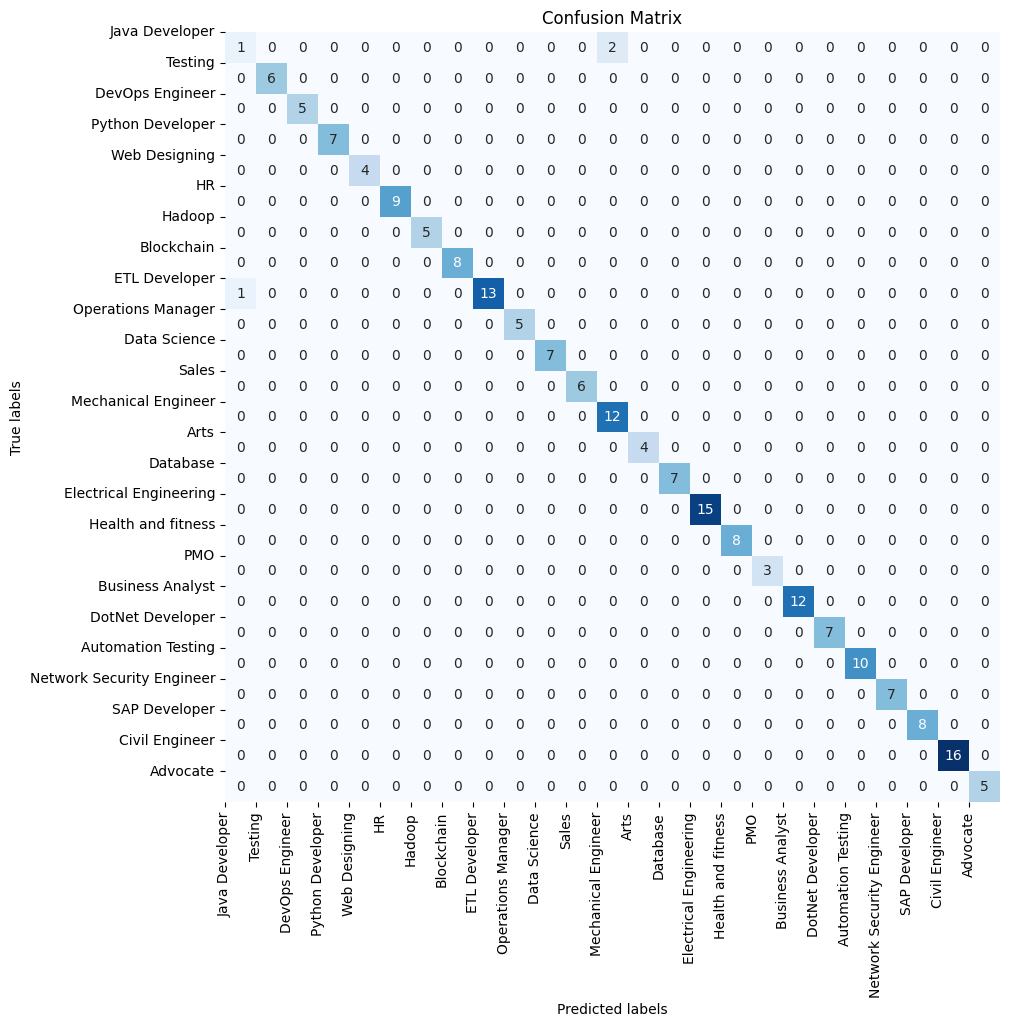

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the category mapping
category_mapping = {
    "Java Developer": 15,
    "Testing": 23,
    "DevOps Engineer": 8,
    "Python Developer": 20,
    "Web Designing": 24,
    "HR": 12,
    "Hadoop": 13,
    "Blockchain": 3,
    "ETL Developer": 10,
    "Operations Manager": 18,
    "Data Science": 6,
    "Sales": 22,
    "Mechanical Engineer": 16,
    "Arts": 1,
    "Database": 7,
    "Electrical Engineering": 11,
    "Health and fitness": 14,
    "PMO": 19,
    "Business Analyst": 4,
    "DotNet Developer": 9,
    "Automation Testing": 2,
    "Network Security Engineer": 17,
    "SAP Developer": 21,
    "Civil Engineer": 5,
    "Advocate": 0
}

print("Category Map:")
for category, index in category_mapping.items():
    print(f"{category}: {index}")

y_pred_categorical = label_encoder.inverse_transform(y_pred_labels)
y_test_categorical = label_encoder.inverse_transform(y_test)

conf_matrix = confusion_matrix(y_test_categorical, y_pred_categorical)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.xticks(ticks=range(len(category_mapping)), labels=category_mapping.keys(), rotation=90)
plt.yticks(ticks=range(len(category_mapping)), labels=category_mapping.keys(), rotation=0)

plt.title('Confusion Matrix')
plt.show()


In [ ]:
model_train.save("trained_model.h5")

In [ ]:
model_train.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
Total params: 312925 (1.19 MB)
Trainable params: 312925 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
print(requiredTarget)

[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5 15 15 15 15 15 15 15 15 15 15

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_pred_categories = label_encoder.inverse_transform(y_pred_labels)

y_true_categories = label_encoder.inverse_transform(y_test)

result_df = pd.DataFrame({'True_Category': y_true_categories, 'Predicted_Category': y_pred_categories})

print(result_df)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)


7/7 [==============================] - 0s 50ms/step
     True_Category  Predicted_Category
0               10                  10
1               14                  14
2                0                   0
3                2                   2
4               18                  18
..             ...                 ...
188             24                  24
189             21                  21
190              2                   2
191             22                  22
192             16                  16

[193 rows x 2 columns]
Test Accuracy: 0.9948186528497409


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_pred_categories = label_encoder.inverse_transform(y_pred_labels)

y_true_categories = label_encoder.inverse_transform(y_test)

test_indices = np.arange(len(X_test))
result_df = pd.DataFrame({'Resume': requiredText[test_indices],
                           'True_Category': y_true_categories,
                           'Predicted_Category': y_pred_categories})

print(result_df[['Resume', 'True_Category', 'Predicted_Category']])

accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)


7/7 [==============================] - 0s 51ms/step
                                                Resume  True_Category  \
0    Skills Programming Languages Python pandas num...             10   
1    Education Details May 2013 to May 2017 B E UIT...             14   
2    Areas of Interest Deep Learning Control System...              0   
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...              2   
4    Education Details MCA YMCAUST Faridabad Haryan...             18   
..                                                 ...            ...   
188  Education Details June 2014 to June 2018 BE Me...             24   
189   I m hard working person I m self confident an...             21   
190  Education Details May 1999 to September 2002 D...              2   
191  SKILLS Knowledge of software computer Auto CAD...             22   
192  Education Details January 2018 Bachelor s of E...             16   

     Predicted_Category  
0                    10  
1                  

In [ ]:

for index, row in result_df.iterrows():
    print(f"True Category: {row['True_Category']}, Predicted Category: {row['Predicted_Category']}")


True Category: 10, Predicted Category: 10
True Category: 14, Predicted Category: 14
True Category: 0, Predicted Category: 0
True Category: 2, Predicted Category: 2
True Category: 18, Predicted Category: 18
True Category: 19, Predicted Category: 19
True Category: 15, Predicted Category: 15
True Category: 5, Predicted Category: 5
True Category: 18, Predicted Category: 18
True Category: 18, Predicted Category: 18
True Category: 12, Predicted Category: 12
True Category: 6, Predicted Category: 6
True Category: 15, Predicted Category: 15
True Category: 8, Predicted Category: 8
True Category: 3, Predicted Category: 3
True Category: 10, Predicted Category: 10
True Category: 16, Predicted Category: 16
True Category: 23, Predicted Category: 23
True Category: 6, Predicted Category: 6
True Category: 15, Predicted Category: 15
True Category: 20, Predicted Category: 20
True Category: 19, Predicted Category: 19
True Category: 12, Predicted Category: 12
True Category: 21, Predicted Category: 21
True C

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_pred_categories = label_encoder.inverse_transform(y_pred_labels)

y_true_categories = label_encoder.inverse_transform(y_test)

test_indices = np.arange(len(X_test))
result_df = pd.DataFrame({'Resume': requiredText[test_indices],
                           'True_Category': y_true_categories,
                           'Predicted_Category': y_pred_categories})

for index, row in result_df.iterrows():
    true_label_name = label_encoder.inverse_transform([row['True_Category']])[0]
    predicted_label_name = label_encoder.inverse_transform([row['Predicted_Category']])[0]
    print(f"True Label: {true_label_name}, Predicted Label: {predicted_label_name}")

accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)


7/7 [==============================] - 0s 50ms/step
True Label: 10, Predicted Label: 10
True Label: 14, Predicted Label: 14
True Label: 0, Predicted Label: 0
True Label: 2, Predicted Label: 2
True Label: 18, Predicted Label: 18
True Label: 19, Predicted Label: 19
True Label: 15, Predicted Label: 15
True Label: 5, Predicted Label: 5
True Label: 18, Predicted Label: 18
True Label: 18, Predicted Label: 18
True Label: 12, Predicted Label: 12
True Label: 6, Predicted Label: 6
True Label: 15, Predicted Label: 15
True Label: 8, Predicted Label: 8
True Label: 3, Predicted Label: 3
True Label: 10, Predicted Label: 10
True Label: 16, Predicted Label: 16
True Label: 23, Predicted Label: 23
True Label: 6, Predicted Label: 6
True Label: 15, Predicted Label: 15
True Label: 20, Predicted Label: 20
True Label: 19, Predicted Label: 19
True Label: 12, Predicted Label: 12
True Label: 21, Predicted Label: 21
True Label: 8, Predicted Label: 8
True Label: 6, Predicted Label: 6
True Label: 7, Predicted Label

**Transfer Learning and Resume Data Collection using IIIT Guwahati Website**

In [ ]:
!pip install PyPDF2 pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import PyPDF2
import pandas as pd
data = pd.DataFrame(columns=['Resume', 'Department'])

In [ ]:
import PyPDF2
import pandas as pd

def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page_num in range(len(reader.pages)):
                text += reader.pages[page_num].extract_text()
    except PyPDF2.utils.PdfReadError as e:
        print(f"Error reading PDF: {e}")
    return text

pdf_files = [
    "/content/www_iiitg.ac.pdf",
    "/content/www_iiitg.ac (9).pdf",
    "/content/www_iiitg.ac (7).pdf",
    "/content/www_iiitg.ac (6).pdf",
    "/content/www_iiitg.ac (5).pdf",
    "/content/www_iiitg.ac (4).pdf",
    "/content/www_iiitg.ac (3).pdf",
    "/content/www_iiitg.ac (20).pdf",
    "/content/www_iiitg.ac (2).pdf",
    "/content/www_iiitg.ac (18).pdf",
    "/content/www_iiitg.ac (17).pdf",
    "/content/www_iiitg.ac (16).pdf",
    "/content/www_iiitg.ac (14).pdf",
    "/content/www_iiitg.ac (13).pdf",
    "/content/www_iiitg.ac (12).pdf",
    "/content/www_iiitg.ac (11).pdf",
    "/content/www_iiitg.ac (10).pdf",
    "/content/www_iiitg.ac (1).pdf",
    "/content/www-iiitg-ac-in-computer-science-and-engineering-dr-rakesh-matam-1.pdf",
    "/content/www-iiitg-ac-in-computer-science-and-engineering-dr-subhasish-dhal.pdf",
    "/content/www-iiitg-ac-in-computer-science-and-engineering-moumita-roy.pdf",
    "/content/www_iiitg.ac_ece.pdf",
    "/content/www_iiitg.ac (1)_ece.pdf",
    "/content/www_iiitg.ac (2)_ece.pdf",
    "/content/www_iiitg.ac (4)_ece.pdf",
    "/content/www_iiitg.ac (5)_ece.pdf",
    "/content/www_iiitg.ac (6)_ece.pdf",
    "/content/www_iiitg.ac (9)_ece.pdf",
    "/content/www_iiitg.ac (10)_ece.pdf",
    "/content/www_iiitg.ac (11)_ece.pdf",
    "/content/www_iiitg.ac (12)_ece.pdf",
    "/content/www_iiitg.ac (13)_ece.pdf",
    "/content/www_iiitg.ac (14)_ece.pdf"

]

data = pd.DataFrame(columns=['Resume', 'Department'])
data_list = []

for pdf_file in pdf_files:
    text = extract_text_from_pdf(pdf_file)
    data_list.append({'Resume': text})

data = pd.DataFrame(data_list)

print(data)


                                               Resume
0   NIRF RANKING\nDr. Angshuman Jana\nAssistant Pr...
1   NIRF RANKING\nDr. Pawan K. Mishra\nAssistant P...
2   NIRF RANKING\nDr. Parashjyoti Borah\nAssistant...
3   NIRF RANKING\nDr. Nilotpal Chakraborty\nAssist...
4   NIRF RANKING\nDr. Nilkanta Sahu\nAsst. Prof. (...
5   NIRF RANKING\nDr. Krishnandu Hazra\nAssistant ...
6   NIRF RANKING\nDr. Kaustuv Nag\nAssistant Profe...
7   NIRF RANKING\nProf. Gautam Barua\nProfessor\nP...
8   NIRF RANKING\nDr. Debashree Devi\nAssistant Pr...
9   NIRF RANKING\nManojit Ghose\nAssistant Profess...
10  NIRF RANKING\nDr. Upasana T alukdar\nAssistant...
11  NIRF RANKING\nDr. Sumit Mishra\nAssistant Prof...
12  NIRF RANKING\nDr. Shubha Brata Nath\nAssistant...
13  NIRF RANKING\nDr. Sanjay Moulik\nAssistant Pro...
14  NIRF RANKING\nDr. Rohit Tripathi\nAssistant Pr...
15  NIRF RANKING\nDr. Radhika Sukapuram\nAssistant...
16  NIRF RANKING\nDr. Phrangboklang Lyngton\nThang...
17  NIRF RANKING\nDr. Arijit

In [ ]:
Department = ["Compilers", "Approximation Algorithms", "Machine Learning", "Introduction to Cyber Physical System", "Operating Systems", "Software Engineering", "Data Structures", "Storage Systems", "Database Management Systems", "Compilers", "Artificial Intelligence", "Database Management Systems", "Computer Security", "Software Engineering", "Operating Systems", "Advanced Computer Networks", "Computer Organization and Architecture", "Computer Organization and Architecture", "Computer Security", "Introduction to Blockchain and Cryptocurrency", "Artificial Intelligence", "Microwave Engineering", "Low Power VLSI Design", "Intellectual Property Rights for Information Technology", "Information Theory and Coding", "VLSI Design", "Digital Signal Processing", "Principles of Communication", "Basic Electronics Circuits", "Embedded Systems", "Architectural Design of Digital Integrated Ciruits", "Pattern recognition and Machine Learning", "Basic Electronics Circuits"]
data['Department'] = Department

In [ ]:
print(data)

                                               Resume  \
0   NIRF RANKING\nDr. Angshuman Jana\nAssistant Pr...   
1   NIRF RANKING\nDr. Pawan K. Mishra\nAssistant P...   
2   NIRF RANKING\nDr. Parashjyoti Borah\nAssistant...   
3   NIRF RANKING\nDr. Nilotpal Chakraborty\nAssist...   
4   NIRF RANKING\nDr. Nilkanta Sahu\nAsst. Prof. (...   
5   NIRF RANKING\nDr. Krishnandu Hazra\nAssistant ...   
6   NIRF RANKING\nDr. Kaustuv Nag\nAssistant Profe...   
7   NIRF RANKING\nProf. Gautam Barua\nProfessor\nP...   
8   NIRF RANKING\nDr. Debashree Devi\nAssistant Pr...   
9   NIRF RANKING\nManojit Ghose\nAssistant Profess...   
10  NIRF RANKING\nDr. Upasana T alukdar\nAssistant...   
11  NIRF RANKING\nDr. Sumit Mishra\nAssistant Prof...   
12  NIRF RANKING\nDr. Shubha Brata Nath\nAssistant...   
13  NIRF RANKING\nDr. Sanjay Moulik\nAssistant Pro...   
14  NIRF RANKING\nDr. Rohit Tripathi\nAssistant Pr...   
15  NIRF RANKING\nDr. Radhika Sukapuram\nAssistant...   
16  NIRF RANKING\nDr. Phrangbok

In [ ]:
All_Departments = ["Compilers ", "Approximation Algorithms", "Machine Learning", "Introduction to Cyber Physical System ", "Operating Systems", "Software Engineering", "Data Structures", "Storage Systems", " Database Management Systems", "Artificial Intelligence", "Computer Security", " Advanced Computer Networks", "Computer Organization and Architecture", "Introduction to Blockchain and Cryptocurrency ", "Computer Programming", "Algorithms", "Theory of computation", "Computer Networks", "Cloud Computing", "Data Analytics", "Real Time Sytems", "Game Theory", "Introduction to Graph Theory", "Number Theory in Cryptography", "Parallel Programming", "Image and Video Processing", "Ubiquitous Computing", "Design of Internet of things", "Financial Engineering", "Network Science", "Evolutionary Computation", "Semantic Web Technology", "Human Computer Interaction", "Natural Language Processing", "Deep Learning", "Fuzzy Sets, Logic and System", "Web Data Mining", "Computer Vision", "Continual Learning", "Socaial Network Analysis", "Parallel Computer Architecture", "Introduction to Big Data Processing"]

In [ ]:
data['cleaned_resume'] = ''

In [ ]:
targetLabels  = data['cleaned_resume'].unique()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))


In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download("stopwords")
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('T', 622), ('IEEE', 508), ('pages', 387), ('A', 378), ('S', 349), ('Conference', 308), ('International', 258), ('K', 232), ('2022', 198), ('India', 197), ('P', 182), ('Systems', 178), ('2020', 166), ('R', 165), ('Guwahati', 162), ('M', 157), ('I', 156), ('2019', 156), ('Engineering', 150), ('2021', 146), ('1', 144), ('B', 137), ('echnology', 135), ('Computer', 126), ('Institute', 119), ('Computing', 119), ('Biswas', 115), ('2018', 112), ('based', 107), ('Communications', 104), ('Journal', 103), ('2023', 101), ('Design', 99), ('Communication', 93), ('Ghosh', 91), ('E', 90), ('Information', 89), ('2016', 89), ('Networks', 86), ('Processing', 86), ('vol', 85), ('Chakraborty', 85), ('2017', 84), ('using', 84), ('Singh', 83), ('e', 80), ('V', 79), ('Kumar', 79), ('Based', 79), ('Signal', 79)]


In [ ]:
print(data)

                                               Resume  \
0   NIRF RANKING\nDr. Angshuman Jana\nAssistant Pr...   
1   NIRF RANKING\nDr. Pawan K. Mishra\nAssistant P...   
2   NIRF RANKING\nDr. Parashjyoti Borah\nAssistant...   
3   NIRF RANKING\nDr. Nilotpal Chakraborty\nAssist...   
4   NIRF RANKING\nDr. Nilkanta Sahu\nAsst. Prof. (...   
5   NIRF RANKING\nDr. Krishnandu Hazra\nAssistant ...   
6   NIRF RANKING\nDr. Kaustuv Nag\nAssistant Profe...   
7   NIRF RANKING\nProf. Gautam Barua\nProfessor\nP...   
8   NIRF RANKING\nDr. Debashree Devi\nAssistant Pr...   
9   NIRF RANKING\nManojit Ghose\nAssistant Profess...   
10  NIRF RANKING\nDr. Upasana T alukdar\nAssistant...   
11  NIRF RANKING\nDr. Sumit Mishra\nAssistant Prof...   
12  NIRF RANKING\nDr. Shubha Brata Nath\nAssistant...   
13  NIRF RANKING\nDr. Sanjay Moulik\nAssistant Pro...   
14  NIRF RANKING\nDr. Rohit Tripathi\nAssistant Pr...   
15  NIRF RANKING\nDr. Radhika Sukapuram\nAssistant...   
16  NIRF RANKING\nDr. Phrangbok

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

trained_model = load_model("trained_model.h5")

requiredText = data['cleaned_resume'].values
requiredTarget = data['Department'].values

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(requiredText)

X_sequences = tokenizer.texts_to_sequences(requiredText)

max_len = 200
X_padded = pad_sequences(X_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(requiredTarget)


X_train, X_test, y_train, y_test = train_test_split(X_padded, y, random_state=42, test_size=0.1)
print(X_padded.shape)

num_classes = len(np.unique(y))
vocab_size = len(tokenizer.word_index) + 1
learning_rate = 0.003

new_model = Sequential()

for layer in trained_model.layers[:-1]:
    new_model.add(layer)
    layer.trainable = False

new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=learning_rate)

new_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

new_model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))



(33, 200)
Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 3.2154 - accuracy: 0.1034 - val_loss: 3.3526 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 341ms/step - loss: 3.0764 - accuracy: 0.1034 - val_loss: 3.4479 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 336ms/step - loss: 2.9968 - accuracy: 0.0690 - val_loss: 3.5970 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 321ms/step - loss: 2.8581 - accuracy: 0.1724 - val_loss: 3.8001 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 226ms/step - loss: 2.8179 - accuracy: 0.2069 - val_loss: 4.0225 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 242ms/step - loss: 2.6700 - accuracy: 0.1724 - val_loss: 4.2334 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 198ms/step - loss: 2.6340 - accuracy: 0.3103 - val_loss: 4.4366 - val

In [ ]:
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense_20 (Dense)            (None, 256)               25856     
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 25)                3225      
                                                                 
Total params: 372377 (1.42 MB)
Trainable params: 61977 (242.10 KB)
Non-trainable params: 310400 (1.18 MB)
_________________________________________________________________
